In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%autosave 1

Autosaving every 1 seconds


With the help of this seed we will be able to generate the same results again and again 

In [2]:
np.random.seed(0)

In [3]:
raw = pd.read_csv('diabetes.csv')
raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from random import randint
raw.iloc[randint(0,len(raw))]

Pregnancies                   1.000
Glucose                     153.000
BloodPressure                82.000
SkinThickness                42.000
Insulin                     485.000
BMI                          40.600
DiabetesPedigreeFunction      0.687
Age                          23.000
Outcome                       0.000
Name: 153, dtype: float64

In [5]:
raw.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
raw.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

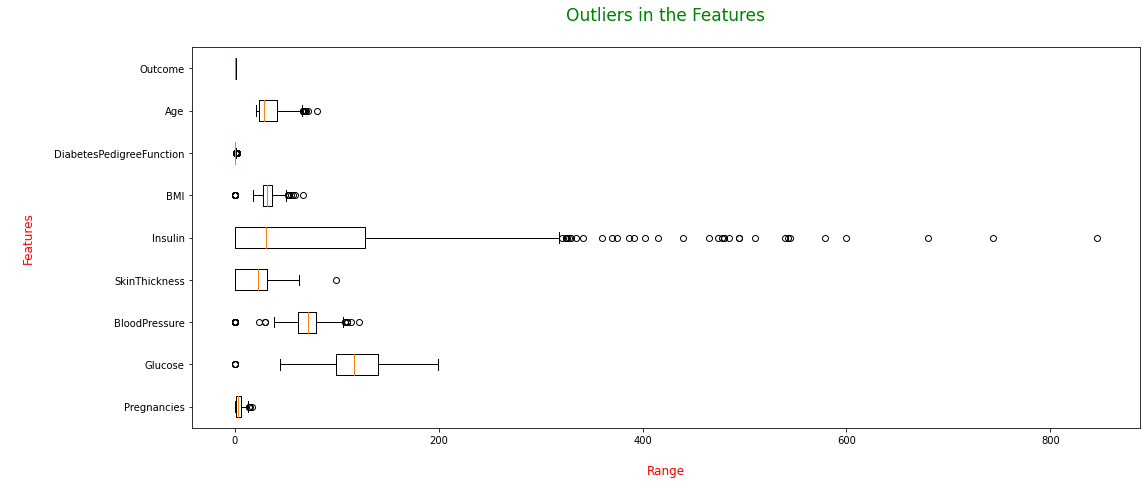

In [9]:
plt.figure(figsize=(17, 7)) # height x width

plt.boxplot(raw[[x for x in raw.columns.values.tolist()]].values,vert=False)
plt.ylabel("\nFeatures\n",color='red',fontsize=12)
plt.xlabel("\nRange\n",color='red',fontsize=12)
plt.title("Outliers in the Features\n",color='Green',fontsize=17)
plt.yticks([x for x in range(1,len(raw.columns)+1)],[x for x in raw.columns.values.tolist()], rotation=0)

plt.show()

In [10]:
from scipy import stats
for x in range (50):
    raw_clean = raw[(np.abs(stats.zscore(raw)) < 3).all(axis=1)]

raw_clean = raw_clean.reset_index(drop=True)
raw_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
683,10,101,76,48,180,32.9,0.171,63,0
684,2,122,70,27,0,36.8,0.340,27,0
685,5,121,72,23,112,26.2,0.245,30,0
686,1,126,60,0,0,30.1,0.349,47,1


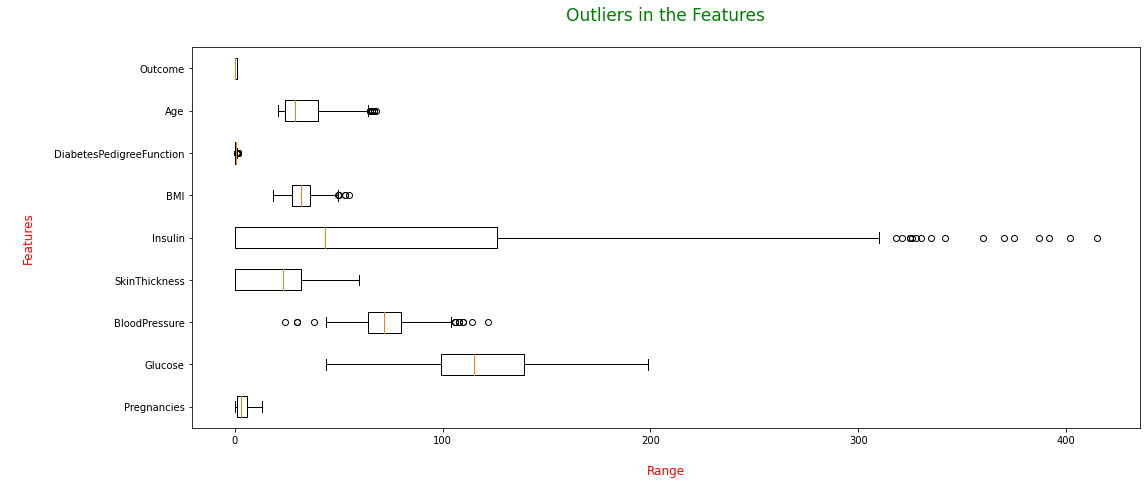

In [11]:
plt.figure(figsize=(17, 7)) # height x width

plt.boxplot(raw_clean[[x for x in raw_clean.columns.values.tolist()]].values,vert=False)
plt.ylabel("\nFeatures\n",color='red',fontsize=12)
plt.xlabel("\nRange\n",color='red',fontsize=12)
plt.title("Outliers in the Features\n",color='Green',fontsize=17)
plt.yticks([x for x in range(1,len(raw_clean.columns)+1)],[x for x in raw_clean.columns.values.tolist()], rotation=0)

plt.show()

In [12]:
raw_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,688.0,3.845930,3.279256,0.000,1.000,3.00,6.0000,13.000
Glucose,688.0,120.293605,30.005790,44.000,99.000,115.00,139.0000,199.000
BloodPressure,688.0,72.345930,12.312859,24.000,64.000,72.00,80.0000,122.000
SkinThickness,688.0,20.787791,15.405391,0.000,0.000,23.00,32.0000,60.000
Insulin,688.0,72.507267,90.106939,0.000,0.000,43.50,126.0000,415.000
BMI,688.0,32.209157,6.618891,18.200,27.400,32.00,36.3000,55.000
DiabetesPedigreeFunction,688.0,0.454555,0.284527,0.078,0.245,0.37,0.6055,1.461
Age,688.0,33.094477,11.436990,21.000,24.000,29.00,40.0000,68.000
Outcome,688.0,0.329942,0.470534,0.000,0.000,0.00,1.0000,1.000


Scaling the dataframe 

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(raw_clean),columns = raw_clean.columns)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021,1.0
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766,0.0
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043,1.0
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000,0.0
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489,0.0
...,...,...,...,...,...,...,...,...,...
683,0.769231,0.367742,0.530612,0.800000,0.433735,0.399457,0.067245,0.893617,0.0
684,0.153846,0.503226,0.469388,0.450000,0.000000,0.505435,0.189443,0.127660,0.0
685,0.384615,0.496774,0.489796,0.383333,0.269880,0.217391,0.120752,0.191489,0.0
686,0.076923,0.529032,0.367347,0.000000,0.000000,0.323370,0.195951,0.553191,1.0


In [14]:
X = dataset.drop(columns=["Outcome"])
Y = dataset["Outcome"]

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489
...,...,...,...,...,...,...,...,...
683,0.769231,0.367742,0.530612,0.800000,0.433735,0.399457,0.067245,0.893617
684,0.153846,0.503226,0.469388,0.450000,0.000000,0.505435,0.189443,0.127660
685,0.384615,0.496774,0.489796,0.383333,0.269880,0.217391,0.120752,0.191489
686,0.076923,0.529032,0.367347,0.000000,0.000000,0.323370,0.195951,0.553191


In [16]:
Y.value_counts()

0.0    461
1.0    227
Name: Outcome, dtype: int64

As we can see that the dataset is not balanced so we will need to make it balanced as imbalance dataset gives bad accuracy

In [17]:
from imblearn.combine import SMOTETomek

In [18]:
smote = SMOTETomek(n_jobs=-1,random_state=72)

In [19]:
x,y = smote.fit_resample(X, Y)

In [20]:
y.value_counts()

1.0    450
0.0    450
Name: Outcome, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20,stratify=y,random_state=42)

[18:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


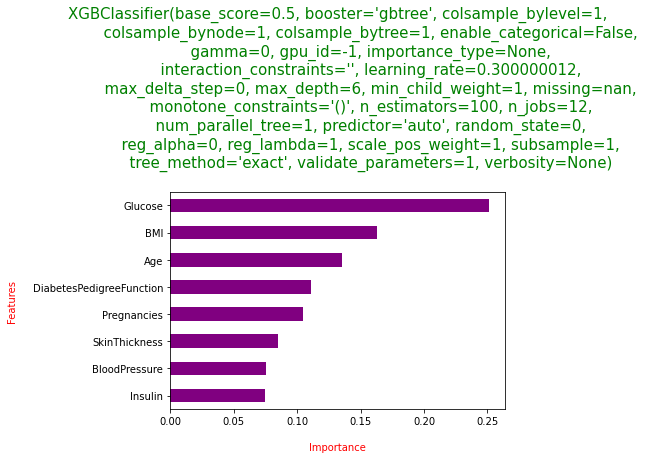

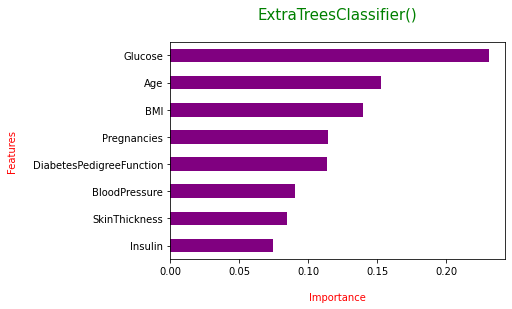

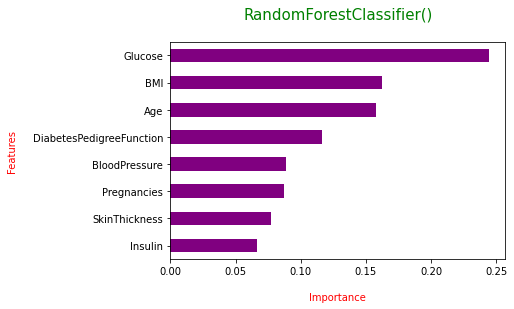

In [22]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

ensembles = [XGBClassifier,ExtraTreesClassifier,RandomForestClassifier]

rounding = np.vectorize(lambda x : round(x,4))

for ensem in ensembles:
    mdl=ensem()
    mdl.fit(x,y)
    mdl_feature = pd.Series(rounding(mdl.feature_importances_),index=x.columns).sort_values()
    mdl_feature.plot(kind='barh',color='purple')
    plt.xlabel('\nImportance',color='red')
    plt.ylabel('Features\n',color='red')
    plt.title(f'{mdl}\n',color='green',fontsize=15)
    plt.show()

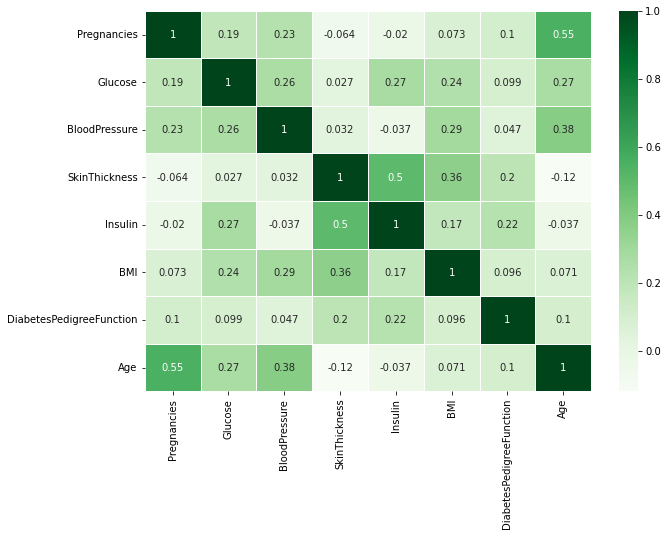

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 7))  #width x height
p = sns.heatmap(x_train.corr(), annot=True, cmap='Greens', linewidths=.5)

In [24]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
percentage = 85
corr_features = correlation(x_train,percentage/100)
print(f"{percentage}% corr_features are\n{corr_features}\n")
print(f"So there are {len(set(corr_features))} corr_features")

85% corr_features are
set()

So there are 0 corr_features


In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
%%time
et = ExtraTreesClassifier(n_estimators=2000,n_jobs=-1)
et.fit(x_train,y_train)

CPU times: total: 4.31 s
Wall time: 2.32 s


ExtraTreesClassifier(n_estimators=2000, n_jobs=-1)

In [28]:
pred = et.predict(x_test)

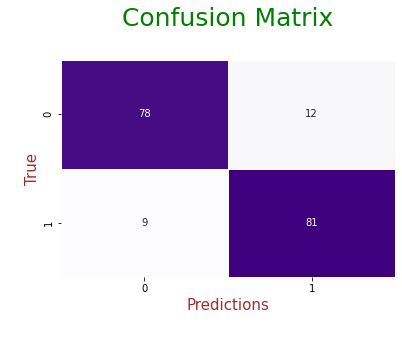

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8966    0.8667    0.8814        90
         1.0     0.8710    0.9000    0.8852        90

    accuracy                         0.8833       180
   macro avg     0.8838    0.8833    0.8833       180
weighted avg     0.8838    0.8833    0.8833       180



Let's check weather if we train the model for deep learning will be able to improve the accuracy ?

In [31]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18104365953860024719
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2916574823
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5652149864138111743
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Flatten

In [33]:
from tensorflow import keras
import keras_tuner as kt

In [50]:
def build_model(hp):

  input = len(x.columns)

  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=(input,)))

  for i in range(hp.Int('num_layers',2,18)):
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=64,max_value=1088,step=64),
                                activation=hp.Choice('act_' + str(i),['tanh', 'relu']))),
    keras.layers.Dropout(0.5),

  model.add(keras.layers.Dense(32, activation='sigmoid')),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1.0,1e-1,1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [51]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    #found: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
    max_trials=20,
    executions_per_trial=10,
    directory='project_00')

In [52]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
tuner.search(x_train, y_train,
             epochs=1000,
             validation_data=(x_test, y_test),
             use_multiprocessing=True,batch_size=None, verbose=True,workers=-1,callbacks=[stop_early]
             )

Trial 1 Complete [00h 00m 26s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.5
Total elapsed time: 00h 00m 26s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
num_layers        |18                |11                
units_0           |384               |640               
act_0             |relu              |relu              
units_1           |640               |192               
act_1             |relu              |tanh              
learning_rate     |0.001             |0.1               
units_2           |384               |64                
act_2             |tanh              |tanh              
units_3           |448               |64                
act_3             |relu              |tanh              
units_4           |448               |64                
act_4             |tanh              |tanh              
units_5           |704               |64                
act_5             |relu              |tanh              
units_

Traceback (most recent call last):
  File "D:\Anaconda\envs\diabetes_prediction_gpu_neural\lib\site-packages\keras_tuner\engine\tuner.py", line 170, in _try_build
    model = self._build_hypermodel(hp)
  File "D:\Anaconda\envs\diabetes_prediction_gpu_neural\lib\site-packages\keras_tuner\engine\tuner.py", line 158, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "C:\Users\AKSHAY SATPUTE\AppData\Local\Temp\ipykernel_23804\811544647.py", line 10, in build_model
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=64,max_value=1088,step=64),
  File "D:\Anaconda\envs\diabetes_prediction_gpu_neural\lib\site-packages\tensorflow\python\training\tracking\base.py", line 530, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "D:\Anaconda\envs\diabetes_prediction_gpu_neural\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 228, in add
    output_tensor = layer(self.outputs[0])
  File "D:\Anaconda\envs\diabetes_prediction

Invalid model 0/5
Epoch 1/1000
23/23 [==============================] - 1s 17ms/step - loss: 0.7311 - accuracy: 0.5125 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.7244 - accuracy: 0.4778 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.7117 - accuracy: 0.5028 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.4986 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/1000
23/23 [==============================] - 0s 10ms/step - loss: 0.6999 - accuracy: 0.5153 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.6999 - accuracy: 0.4819 - val_loss: 0.6932 - val_ac

KeyboardInterrupt: 

In [37]:
best_model = tuner.get_best_models()[0]

In [38]:
print('training accuracy')
best_model.evaluate(x_train,y_train)
print('test accuracy')
best_model.evaluate(x_test,y_test)

training accuracy
23/23 [==============================] - 6s 2ms/step - loss: 0.3891 - accuracy: 0.8458
test accuracy
6/6 [==============================] - 2s 4ms/step - loss: 0.3774 - accuracy: 0.8722


[0.3773999512195587, 0.8722222447395325]

In [39]:
%%time
pred =best_model.predict(x_train)

CPU times: total: 219 ms
Wall time: 835 ms


In [40]:
y_pred=[]

for s in pred:
    if s>=.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

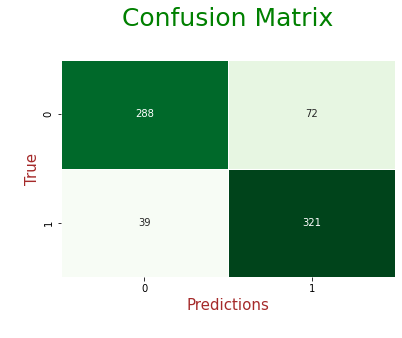

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_train,y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8807    0.8000    0.8384       360
         1.0     0.8168    0.8917    0.8526       360

    accuracy                         0.8458       720
   macro avg     0.8488    0.8458    0.8455       720
weighted avg     0.8488    0.8458    0.8455       720



In [43]:
%%time
predictions =best_model.predict(x_test)

CPU times: total: 1.83 s
Wall time: 1.84 s


In [44]:
y_predictions=[]

for k in predictions:
    if k>=.5 :
        y_predictions.append(1)
    else:
        y_predictions.append(0)

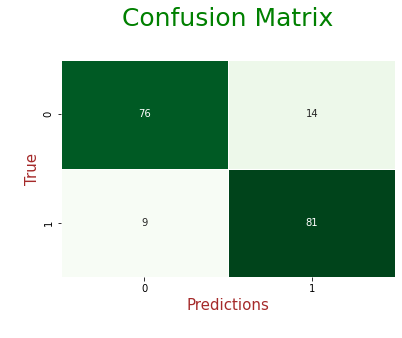

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_predictions))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predictions,digits=4))

              precision    recall  f1-score   support

         0.0     0.8941    0.8444    0.8686        90
         1.0     0.8526    0.9000    0.8757        90

    accuracy                         0.8722       180
   macro avg     0.8734    0.8722    0.8721       180
weighted avg     0.8734    0.8722    0.8721       180

